In [1]:
import tomosipo as ts
import numpy as np
import pickle

In [2]:
vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
pg = ts.parallel(angles=32, shape=(48, 48), size=(1.5, 1.5))

In [3]:
svg = ts.svg(vg, pg)
svg.save("./doc/img/intro_forward_projection_geometries.svg")

In [4]:
A = ts.operator(vg, pg)


In [5]:
x = np.ones(A.domain_shape, dtype=np.float32)

In [6]:
y = A(x)

In [7]:
import matplotlib.pyplot as plt
plt.imshow(y[:, 0, :]) # first projection
plt.show()
plt.imshow(y[:, 8, :]) # quarter rotation
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
import mrcfile
import numpy as np
from scipy.ndimage import zoom

Vol_list = [] 
side_size = 20
for i in range(5):

    file_name = f'./data/grp{i}.mrc'
    with mrcfile.open(file_name) as mrcVol:
        Vol_list.append(np.array(mrcVol.data) )
        #ProjSize1 = int(np.sqrt(np.sum(np.square(Vol1.shape))))
    print(Vol_list[i].shape)
    
    #Then reshape
    h, w, l = Vol_list[i].shape[0], Vol_list[i].shape[1], Vol_list[i].shape[2]
    Vol_list[i] = zoom(Vol_list[i], (side_size/h, side_size/w, side_size/l))
for i in range(5):
    #print(Vol_list[i].shape)
    print(np.var(Vol_list[i]))
ProjSize = int(np.sqrt(np.sum(np.square(Vol_list[0].shape))))
print(ProjSize)

FileNotFoundError: [Errno 2] No such file or directory: './data/grp0.mrc'

In [10]:
import numpy as np
num_angle = 15000
np.random.seed(0)
random_angles = np.random.rand(num_angle, 3)
random_angles[:,0] = random_angles[:,0] * 6.28
random_angles[:,1] = random_angles[:,1] * 3.09
random_angles[:,2] = random_angles[:,2] * 6.28

print(random_angles[:20])
angles2 = random_angles

[[3.4465488  2.20993514 3.785354  ]
 [3.42186639 1.30909333 4.05621503]
 [2.74804769 2.75557857 6.05180214]
 [2.40801274 2.44643037 3.3214601 ]
 [3.56731984 2.86009361 0.44610645]
 [0.547172   0.06247485 5.22885263]
 [4.8868244  2.68833754 6.14572319]
 [5.01871578 1.42597123 4.90172323]
 [0.74276339 1.97735596 0.90025864]
 [5.9325208  1.61251131 2.60407698]
 [1.66140924 2.3923821  2.86462409]
 [3.5697652  0.05806048 3.87875092]
 [3.84396114 1.90632605 5.92673793]
 [4.28183148 1.11087941 2.74456067]
 [4.38112391 0.18609671 4.18729497]
 [4.21160582 0.65008211 0.80965715]
 [1.98089004 1.12386628 3.58083572]
 [2.7544175  3.05407516 0.64084141]
 [1.31174603 0.49844641 4.10152028]
 [1.59067126 1.44090029 1.53499272]]


In [11]:
data_name = '70s_ribsome_true_mean_random_angles'

with open(f'./data/{data_name}/images.pkl', 'rb') as f:
    new_projection = pickle.load( f)
"""
with open('Ribosome.pkl', 'rb') as f:
    new_projection = pickle.load(f)
"""

"\nwith open('Ribosome.pkl', 'rb') as f:\n    new_projection = pickle.load(f)\n"

In [12]:
print(new_projection.shape)

(15000, 34, 34)


In [13]:
import astra
ProjSize = 34
with open('/home/users/lewis841214/Desktop/1project/CryoEMCode/protein-reconstruction/cryoem/Orientation_Vectors.pkl', 'rb') as handle:
    Orientation_Vectors = pickle.load(handle  )
Orientation_Vectors = Orientation_Vectors
print(Orientation_Vectors.shape)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)


(15000, 12)


In [14]:
from tomosipo.geometry.parallel_vec import *
#pg = ParallelVectorGeometry.from_astra(Proj_geom)
pg = ts.from_astra(Proj_geom)

In [15]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(32, 32, 32)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)
from scipy.ndimage import zoom


In [16]:
print(pg.ray_dir[:5])
print(pg.det_v[:5])
print(pg.det_u[:5])


[[-0.59650447 -0.48173293  0.64196246]
 [ 0.25872594 -0.76535396  0.58931673]
 [-0.92641711 -0.08634023 -0.36646515]
 [-0.76794977 -0.11458671  0.63017699]
 [-0.96064009  0.11985684 -0.25060917]]
[[-0.24098466  0.87043718  0.42926159]
 [-0.26720006  0.52957799  0.80507843]
 [ 0.14437403 -0.98040985 -0.13398753]
 [ 0.42884264  0.63881513  0.638756  ]
 [-0.11472507 -0.99277904 -0.03504201]]
[[-0.76557744  0.10135335 -0.63530991]
 [-0.92825913 -0.36576014 -0.06748706]
 [-0.34771753 -0.17703639  0.92073375]
 [-0.47575954  0.76077928 -0.44143826]
 [-0.25299956 -0.00491161  0.96745393]]


In [17]:
print(Orientation_Vectors[:5])
print(pg[:5])

[[ 0.64196246 -0.48173293 -0.59650447  0.          0.          0.
  -0.63530991  0.10135335 -0.76557744  0.42926159  0.87043718 -0.24098466]
 [ 0.58931673 -0.76535396  0.25872594  0.          0.          0.
  -0.06748706 -0.36576014 -0.92825913  0.80507843  0.52957799 -0.26720006]
 [-0.36646515 -0.08634023 -0.92641711  0.          0.          0.
   0.92073375 -0.17703639 -0.34771753 -0.13398753 -0.98040985  0.14437403]
 [ 0.63017699 -0.11458671 -0.76794977  0.          0.          0.
  -0.44143826  0.76077928 -0.47575954  0.638756    0.63881513  0.42884264]
 [-0.25060917  0.11985684 -0.96064009  0.          0.          0.
   0.96745393 -0.00491161 -0.25299956 -0.03504201 -0.99277904 -0.11472507]]
ts.parallel_vec(
    shape=(34, 34),
    ray_dir=array([[-0.59650447, -0.48173293,  0.64196246],
       [ 0.25872594, -0.76535396,  0.58931673],
       [-0.92641711, -0.08634023, -0.36646515],
       [-0.76794977, -0.11458671,  0.63017699],
       [-0.96064009,  0.11985684, -0.25060917]]),
   

In [18]:
from tomosipo.torch_support import to_autograd
import time
"""
First step. write out the
1. Expectation
2. likelihood
Then use .backward solve it


For AU with U with batch n^3, to_autograd take batch input, which is actually what I want!!!!, so no need for one by one concatenate!!!

"""
def reshape_fortran(x, shape):
    if len(x.shape) > 0:
        x = x.permute(*reversed(range(len(x.shape))))
    return x.reshape(*reversed(shape)).permute(*reversed(range(len(shape))))
def Trace_bradcast(a):
    b = torch.einsum('bii->b', a)
    return b
import torch


class MPCA_3d_recon():
    def __init__(self, ProjSize, num_image, n_component, op, Images, exp_name, batch_size = 1000):
        #init
        self.exp_name = exp_name
        self.ProjSize  = ProjSize
        self.z_size = n_component # First set 1 for simplicity
        self.num_image = num_image
        self.n_component = n_component
        self.batch_size = batch_size
        
        """
        projection operator and images
        """
        self.op = to_autograd(op)
        Images = torch.tensor(Images)
        self.All_Image = Images
        self.I = reshape_fortran(Images, (self.num_image, self.ProjSize*self.ProjSize , 1)).float() # N x D^2 x 1
        self.All_I = self.I
        """
        paramters we want to find
        """
        self.U1 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        self.U2 = torch.eye(self.ProjSize)[:, :self.z_size] +1 
        self.U3 = torch.eye(self.ProjSize)[:, :self.z_size] +1
        #print('self.U1',self.U1.shape)
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('ortho_U1',ortho_U1.shape)
        #print(ortho_U1.T@ortho_U1)
        
        self.U1.requires_grad =True
        self.U2.requires_grad =True
        self.U3.requires_grad =True
        self.All_U = torch.kron(self.U1, torch.kron(self.U2, self.U3))
        self.Sigma_Z_inv = torch.eye(self.n_component ** 3) # size: p1 x p2 x p3 
        self.sigma = torch.ones(self.batch_size).reshape(-1, 1 ,1) * 1
        
        """
        Expectation term
        or so called missing data
        """
        self.mu = torch.abs(torch.ones((self.batch_size, n_component **3,1)))
        self.BigSigma_I = torch.abs(torch.ones((self.batch_size, self.n_component**3, self.n_component**3 )))

       

    def A_pro_All_U(self, detach_list = []):
        #print('in A por U')
        #self.All_U # shape = Ps ^3 x n  ^3: which we should make it Ps x Ps x Ps x n ^3 to process
        #A: Ps x Ps x Ps x 1 ->  Ps x Ps x 1
        
        #So overal, we have Mu = N x D^3 x n^3
        #AMu = N x D^2 x n^3
        """
        for i in range(self.n_component**3):
            Vol_i = self.All_U[:, i].reshape(self.ProjSize, self.ProjSize,self.ProjSize)
            Proj_i = self.op(Vol_i).permute(1, 0, 2)
            Proj_i = reshape_fortran(Proj_i, (self.num_image, self.ProjSize*self.ProjSize ,1))
            
            #print(Proj_i.shape)
            if i == 0:
                self.AU = Proj_i
            else:
                self.AU = torch.cat((self.AU, Proj_i), 2)
        #print('self.AU',self.AU.shape)
        
        #Broad cast: torch.matmul
        # (AU).T(AU) = torch.matmul(self.AU.permute(0,2,1), self.AU.permute(0,2,1))
        #torch.matmul(self.AU.permute(0,2,1), self.AU)
        """
        U1 , U2, U3 = self.U1, self.U2, self.U3
        if 1 in detach_list:
            U1 = U1.detach()
        if 2 in detach_list:
            U2 = U2.detach()
        if 3 in detach_list:
            U3 = U3.detach()
        
        
        self.All_U = torch.kron(U1, torch.kron(U2, U3))
        self.All_U = reshape_fortran(self.All_U, (self.ProjSize, self.ProjSize, self.ProjSize, self.n_component**3)) #D^3 x n^3 -> D xD x D x n^3
        self.All_U = self.All_U.permute(3, 0, 1, 2) # make it n x Dx Dx D
        #print(self.All_U.shape)
        self.AU = self.op( self.All_U) # n x Dx Dx D -> n x D x N x D
        #print('self.AU',self.AU.shape)
        self.AU = self.AU.permute(2, 0, 1, 3) # N x n x D x D
        #print( self.AU.permute(2, 0, 1, 3).shape)
        self.AU = reshape_fortran(self.AU, (self.batch_size, self.n_component**3, self.ProjSize**2))
        self.AU = self.AU.permute(0, 2, 1) # N x n x D x D
        
        #print('self.AU',self.AU.shape)
        
    def Expectation(self):
        #print('in Exp')
        
        """
        First, get all projection information
        
        ro_j = 1/sigma^2 * (Sigmz_Z_inv + 1/sigma^2 * (Au)^TAu)^(-1)(Au)^TI
        
        #We expect to get a n_image x n_component matrix for ro
        
        BigSigma = I - 1 / sigma^2 * (I + 1/sigma^2 * (Au)^TAu)^(-1) (Au)^TAu9htu
        
        Here, the shape of All_U is PS^3 x n_component^3, but A can only process a 3d volume PS^3 at once
        
        """
        #print(torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #print((1 / self.sigma **2).shape)
        
        UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print(UTAAU.shape)
        #print((1 / self.sigma **2 * UTAAU ).shape)
        self.mu = torch.inverse(torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU ) * 1 / self.sigma **2 
        self.mu = torch.matmul(self.mu , self.AU.permute(0,2,1))
        self.mu = torch.matmul(self.mu, self.I)
        #print('self.mu.shape',self.mu.shape)
        
        
        """
        So we found Mu
        Then we found Sigma_I
        torch.inverse can broadcast through batch, so just use it
        """
        self.BigSigma_I = torch.inverse((torch.unsqueeze(self.Sigma_Z_inv,0  ) + 1 / self.sigma **2 * UTATAU )) + torch.matmul(self.mu, self.mu.permute(0,2,1))
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        self.mu = self.mu.detach()
        self.BigSigma_I = self.BigSigma_I.detach()
        
    def Q_Function(self, ):
        #print('in Q')
        """
        #left term
        #print('self.AU', torch.mean(self.AU))
        print('in Q')
        print('self.mu ', torch.mean(self.mu ))
        print('self.BigSigma_I', torch.mean(self.BigSigma_I))
        #print('self.sigma', torch.mean(self.sigma))
        print('self.Sigma_Z_inv',torch.mean(self.Sigma_Z_inv))
        print('self.U1', torch.mean(self.U1))
        print('self.U2', torch.mean(self.U2))
        print('self.U3', torch.mean(self.U3))
        
        try:
            print('self.U1.grad.data',torch.mean(self.U1.grad.data))
            print('self.U2.grad.data',torch.mean(self.U2.grad.data))
            print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        except:
            pass
        """
        
        left = -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu 
        #UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
        #print('self.AU', self.AU.shape)
        #print('self.BigSigma_I', self.BigSigma_I.shape)
        #print('self.AU.permute(0,2,1)', self.AU.permute(0,2,1).shape)
        left = left + Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))   #self.mu.permute(0, 2, 1) @  UTATAU @ self.mu
        left = 1 / self.sigma **2 *left
        
        #middle term
        #print('self.mu', self.mu.shape)
        #print('torch.unsqueeze(self.Sigma_Z_inv,0  )', torch.unsqueeze(self.Sigma_Z_inv,0  ).shape)
        #middle = self.mu.permute(0, 2, 1)  @torch.unsqueeze(self.Sigma_Z_inv,0  ) @self.mu
        middle = Trace_bradcast( torch.unsqueeze(self.Sigma_Z_inv,0  ) @ self.BigSigma_I )
        
        
        right = torch.log(torch.det(torch.inverse(self.Sigma_Z_inv)))
        self.Q = -1/2 * torch.sum(left + middle + right)/100000000
        #print('self.Q',self.Q.shape,self.Q)
        #print(self.Q)
    def Maximization(self, ratio):
        #print('in max')
        """
        Update U1, U2, U3 by gradient assent and use svd to make sure orthogonality
        self.U1.grad.data.zero_() # conduct zero grad
        self.Q.backward()
        
        """
        self.Sigma_Z_inv = torch.inverse(torch.mean(self.BigSigma_I, 0)).detach()
        
        
        start = time.time()
        
        self.A_pro_All_U([2,3])
        self.Q_Function()
        #print('q fun ction time', time.time()- start)
        self.Q.backward()
        #print('backward time', time.time()- start)
        
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        self.U1.data +=  lr * self.U1.grad.data
        self.U1.data = torch.qr(self.U1.data)[0]
        
        self.U1.grad.data.zero_()

        #print('update time', time.time()- start)
        
        self.A_pro_All_U()
        #print('AU time', time.time()- start)
        ##self.Expectation()
        #print('expectation time', time.time()- start)
        
        
        self.A_pro_All_U([1,3])
        self.Q_Function()
        self.Q.backward()
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        self.U2.data = torch.qr(self.U2.data)[0]
        
        self.U2.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        
        
        self.A_pro_All_U([1,2])
        self.Q_Function()
        self.Q.backward()
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        self.U3.data = torch.qr(self.U3.data)[0]
        
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        #self.Expectation()
        print(time.time()-start, 'sec')
        #lr = np.abs(np.mean(self.mu) / np.mean(DeltaMu) )*0.001
        #self.mu = self.mu + lr * DeltaMu
        """
        lr = torch.mean(torch.abs(self.U1)) /  torch.mean(torch.abs(self.U1.grad)) * ratio# 0.01
        self.U1.data +=  lr * self.U1.grad.data
        
        lr = torch.mean(torch.abs(self.U2)) /  torch.mean(torch.abs(self.U2.grad))* ratio#0.01
        self.U2.data += lr * self.U2.grad.data
        
        lr = torch.mean(torch.abs(self.U3)) /  torch.mean(torch.abs(self.U3.grad))* ratio#0.01
        self.U3.data += lr * self.U3.grad.data
        
        self.U1.data = torch.qr(self.U1.data)[0]
        self.U2.data = torch.qr(self.U2.data)[0]
        self.U3.data = torch.qr(self.U3.data)[0]
        #print('self.U1.grad.data',torch.mean(self.U1.grad.data))
        ##print('self.U2.grad.data',torch.mean(self.U2.grad.data))
        #print('self.U3.grad.data',torch.mean(self.U3.grad.data))
        
        self.U1.grad.data.zero_()
        self.U2.grad.data.zero_()
        self.U3.grad.data.zero_()
        self.A_pro_All_U()
        """
        #print('self.I.permute(0, 2, 1) @ self.I', (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu', (-2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu).shape)
        #print('Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))', (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).shape)
        self.sigma = self.I.permute(0, 2, 1) @ self.I -2 * self.I.permute(0, 2, 1) @ self.AU @ self.mu  + (Trace_bradcast(self.AU @ self.BigSigma_I @ self.AU.permute(0,2,1))).reshape(-1, 1, 1)
        #print('self.sigma',self.sigma.shape)
        self.sigma = self.sigma.detach() / self.ProjSize ** 2
        #print(' self.I.permute(0, 2, 1) @ self.I',  (self.I.permute(0, 2, 1) @ self.I).shape)
        #print('self.sigma',self.sigma.shape)
    def Plot_temp(self, num = 10):
        fig,axes=plt.subplots(1,num, figsize=(20, 200))
        print('generated')
        for i in range(num):
            est_I = self.AU @ self.mu
            AU = est_I.detach().numpy()
            image = AU[i].reshape(self.ProjSize,self.ProjSize, order = 'F')
            axes[i].imshow(image)
        plt.show()
        fig,axes=plt.subplots(1,num , figsize=(20, 200))
        print('real')
        for i in range(num):
            #est_I = self.AU @ self.mu
            #AU = est_I.detach().numpy()
            axes[ i].imshow(self.Images[i])
        plt.show()
        
        """
        c = 0
        print('generated')
        est_I = self.AU @ self.mu
        AU = est_I.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        
        c = 11
        print('generated')
        #AU = self.AU.detach().numpy()
        #print(AU.shape)
        image = AU[c].reshape(self.ProjSize,self.ProjSize, order = 'F')
        plt.imshow(image) # quarter rotation
        plt.show()
        #MP3.Q_Function()

        #MP3.Maximization()
        print('real')
        plt.imshow(Images[c])
        plt.show()
        """
        
        
        
    def fit(self, start_ratio):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
        
        ratio = start_ratio
        """
        ratio = start_ratio
        self.A_pro_All_U()
        self.Expectation()
        print('oritinal')
        self.Plot_temp()
        """
        
        temp = []
        for i in range(100000):
            order = np.random.permutation(self.num_image)
            for j in range(int(self.num_image / self.batch_size)):
                batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
                self.I = self.All_I[batch_order] 
                self.Images = self.All_Image[batch_order]
                #print('self.I.shape', self.I.shape)
                #print('batch_order', batch_order.shape)
                
                #Update op
                Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
                Vol_geom = astra.create_vol_geom(34, 34, 34)
                vg = ts.from_astra(Vol_geom)
                pg = ts.from_astra(Proj_geom)
                op = ts.operator(vg, pg)
                self.op = to_autograd(op)
                
                self.A_pro_All_U()
                #self.Q_Function()
                #self.Plot_temp()
                #self.Q_Function()
                self.Expectation()
                self.Q_Function()
                self.Maximization(ratio)
                self.Plot_temp()
                torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_U1.pt')
                torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_U2.pt')
                torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_U3.pt')
                #self.Plot_temp()
            if i % 2 == 1:
                ratio = ratio / 3
            #if i % 3 ==0:
            print(f'the {i} th iter')
            self.Plot_temp()
            
            temp.append([self.U1.data, self.U2.data, self.U3.data])
            with open(f'./snap_shot/{self.exp_name}_MPCA.pkl', 'wb') as f:
                pickle.dump(temp, f)
            torch.save(self.U1, f'./snap_shot/{self.exp_name}_{i}th_U1.pt')
            torch.save(self.U2, f'./snap_shot/{self.exp_name}_{i}th_U2.pt')
            torch.save(self.U3, f'./snap_shot/{self.exp_name}_{i}th_U3.pt')
                #use torch save to save torch tensor
    def Output_colection(self):
        
        """
        If doing SGD, set self.I as part of the images, then the following code run aotumatically.
        Use np.random.permutation(5000)
        self.All_I 
        """
       
        
        temp = []

        order = np.array([i for i in range(self.num_image)])
        for j in range(int(self.num_image / self.batch_size)):
            batch_order = order[self.batch_size * j : self.batch_size * (j + 1) ]
            self.I = self.All_I[batch_order] 
            self.Images = self.All_Image[batch_order]
            #print('self.I.shape', self.I.shape)
            #print('batch_order', batch_order.shape)

            #Update op
            Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors[batch_order])
            Vol_geom = astra.create_vol_geom(34, 34, 34)
            vg = ts.from_astra(Vol_geom)
            pg = ts.from_astra(Proj_geom)
            op = ts.operator(vg, pg)
            self.op = to_autograd(op)

            self.A_pro_All_U()
            #self.Q_Function()
            #self.Plot_temp()
            #self.Q_Function()
            self.Expectation()
            self.Plot_temp()
            temp.extend(self.mu.detach().numpy().tolist())
            print(temp[0][0])
        self.All_mu = temp
        with open(f'./snap_shot/{self.exp_name}_all_mu.pkl', 'wb') as f:
            pickle.dump(self.All_mu , f)

In [18]:
Images = new_projection[:4800]
print(Images.shape)
exp_name = '1217_n_18_MPCA'
ProjSize, num_image, n_component = 34, 4800, 18
batch_size = 400
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
"""
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(32, 32, 32)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
"""
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size)
#MP3.fit(start_ratio = 0.1)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


(4800, 34, 34)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)


'\nMP3.A_pro_All_U()\n\nMP3.Plot_temp()\nMP3.Q_Function()\n\nMP3.Expectation()\nMP3.Q_Function()\nMP3.Maximization()\nMP3.Plot_temp()\nMP3.Q_Function()\nprint(MP3.All_U.shape)\n'

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1395.6551373004913 sec
generated


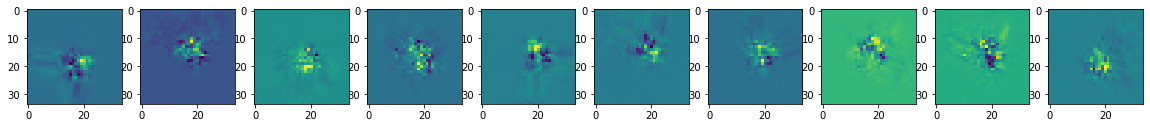

real


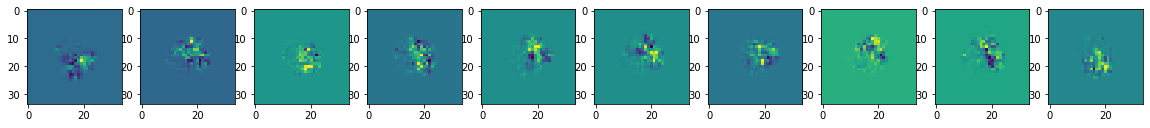

1351.8811132907867 sec
generated


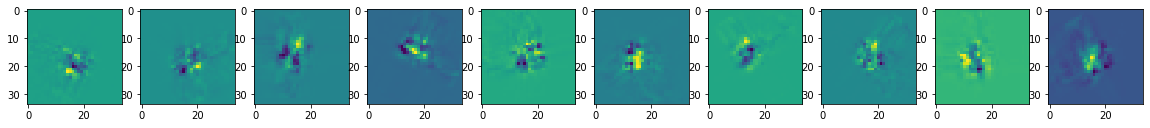

real


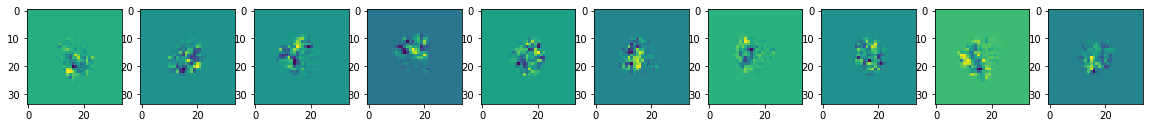

1434.3412473201752 sec
generated


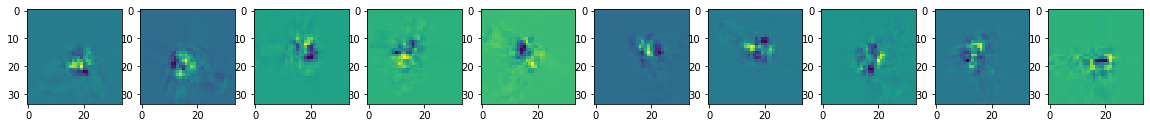

real


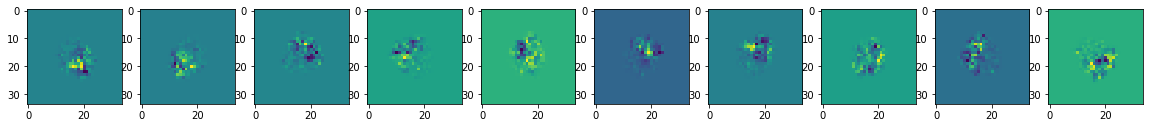

1399.3234124183655 sec
generated


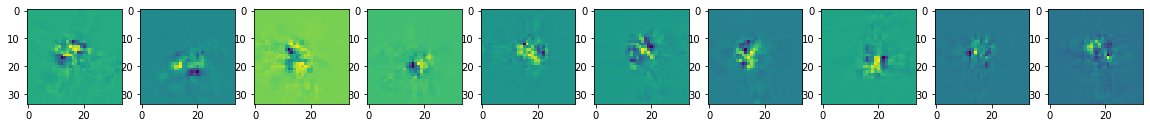

real


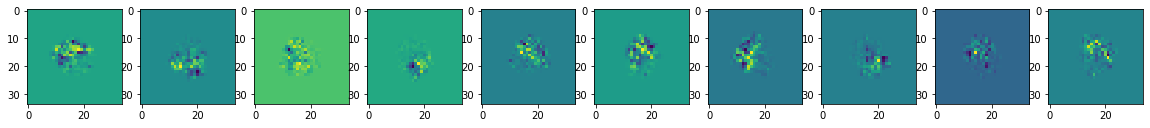

1350.3350219726562 sec
generated


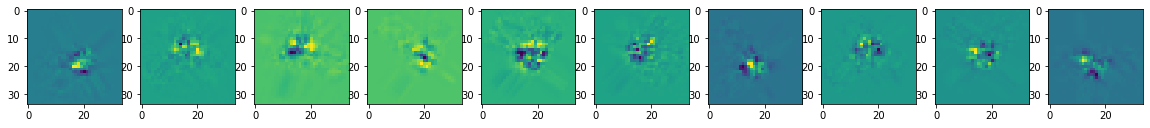

real


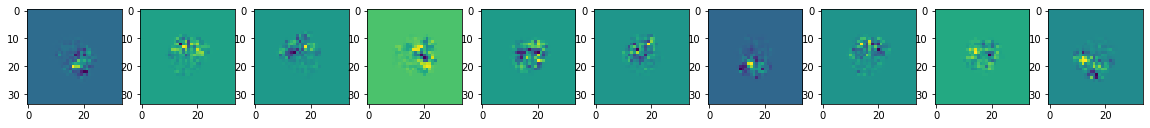

1377.2771134376526 sec
generated


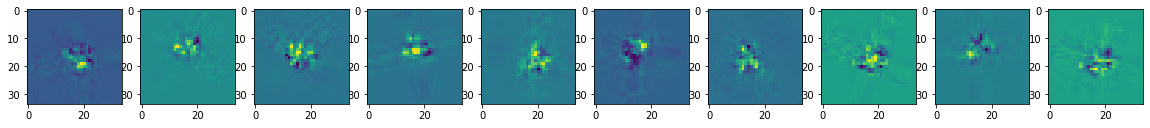

real


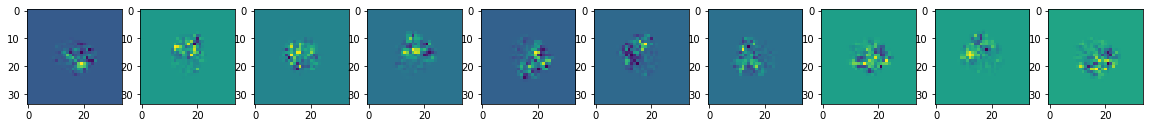

1328.498496055603 sec
generated


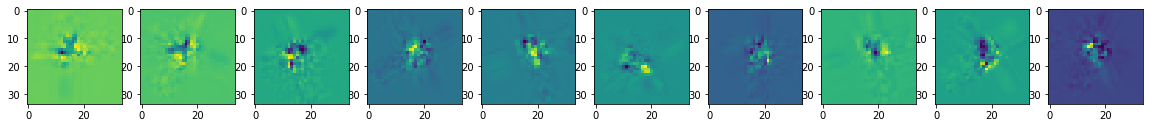

real


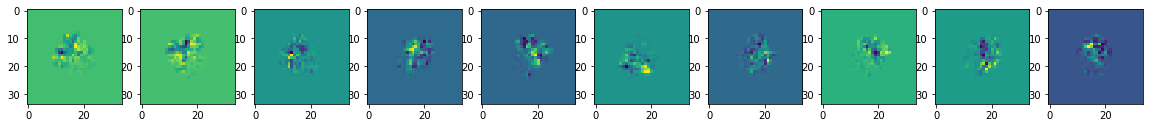

1329.9865522384644 sec
generated


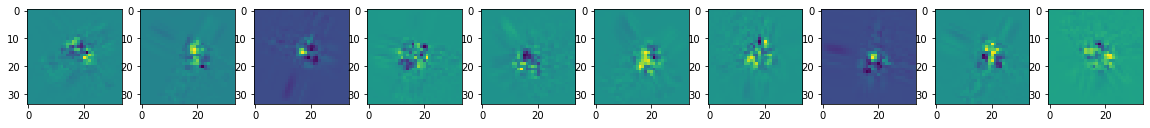

real


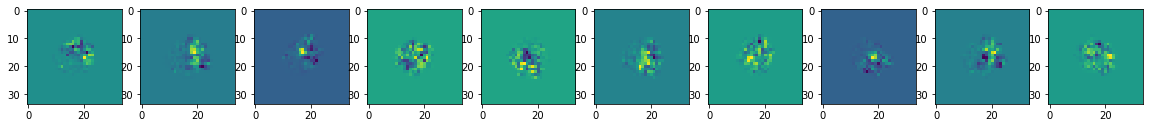

1327.3746900558472 sec
generated


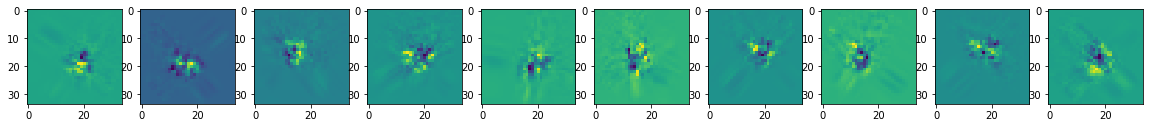

real


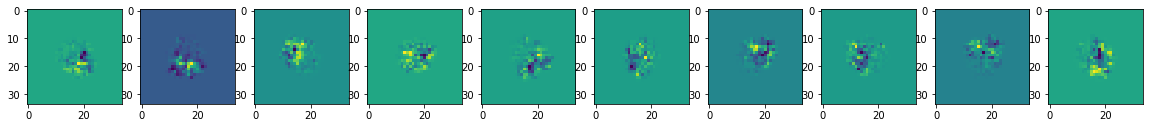

1332.770402431488 sec
generated


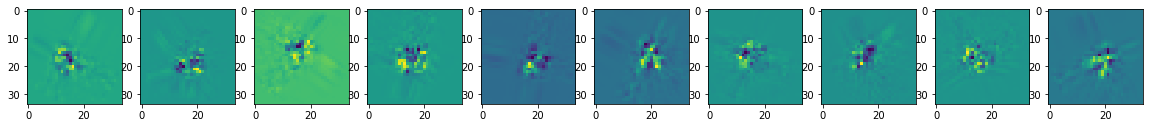

real


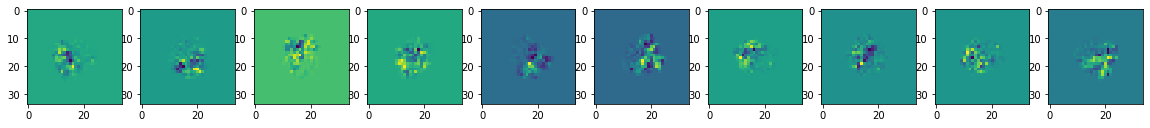

1332.832483291626 sec
generated


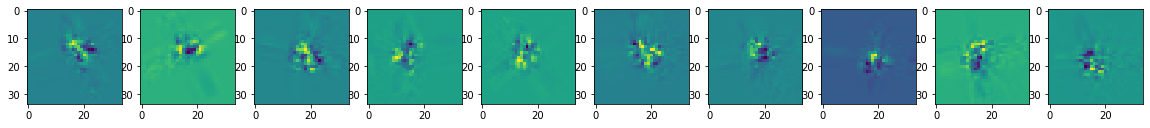

real


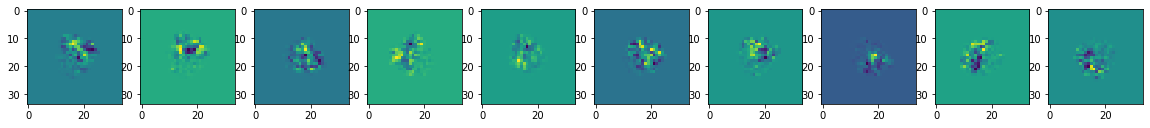

1320.2696685791016 sec
generated


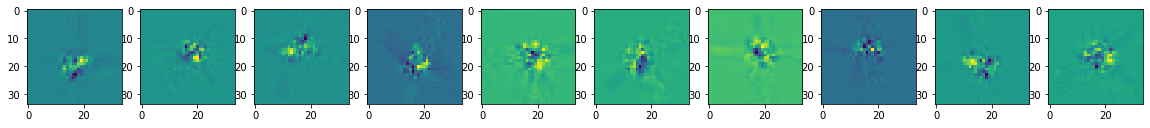

real


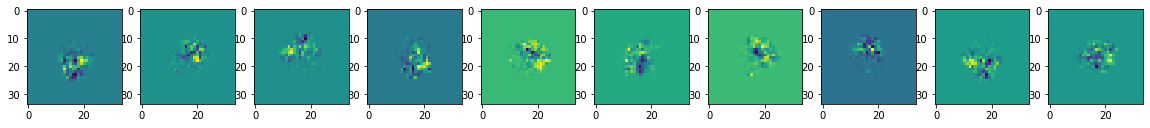

the 0 th iter
generated


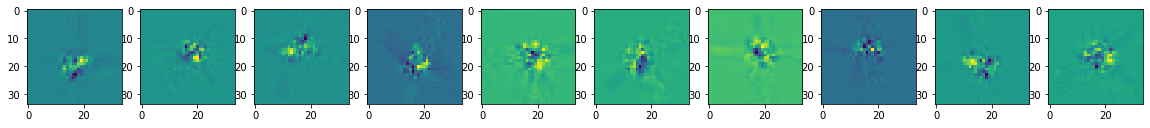

real


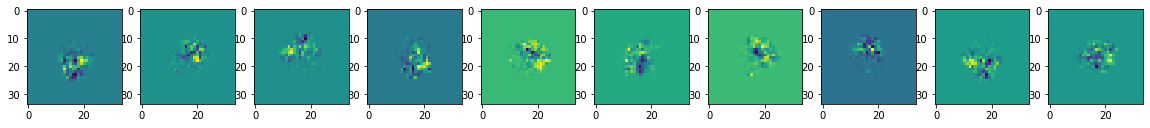

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-51c3d69039b1>", line 14, in <module>
    MP3.fit(start_ratio = 0.1)
  File "<ipython-input-17-4d12dea7a432>", line 375, in fit
    self.Maximization(ratio)
  File "<ipython-input-17-4d12dea7a432>", line 222, in Maximization
    self.A_pro_All_U()
  File "<ipython-input-17-4d12dea7a432>", line 107, in A_pro_All_U
    self.AU = self.op( self.All_U) # n x Dx Dx D -> n x D x N x D
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/torch_support.py", line 85, in f
    return OperatorFunction.apply(x, operator)
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/torch_support.py", line 35, in forward
    operator(input[i], out=out[i])
  File "/home/users/

KeyboardInterrupt: 

In [19]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set

U1 = torch.load('./snap_shot/1216_n_15_MPCA_1th_U1.pt')
U2 = torch.load('./snap_shot/1216_n_15_MPCA_1th_U2.pt')
U3 = torch.load('./snap_shot/1216_n_15_MPCA_1th_U3.pt')
MP3.U1.data[:, :15] = U1.detach()
MP3.U2.data[:, :15] = U2.detach()
MP3.U3.data[:, :15] = U3.detach()




MP3.fit(start_ratio = 0.1)



/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


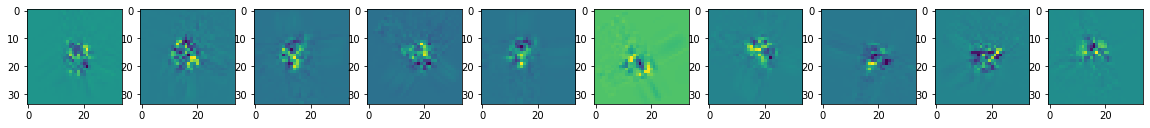

real


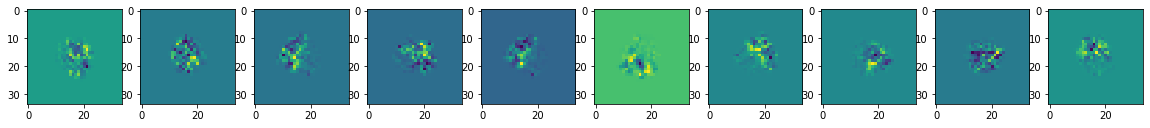

generated


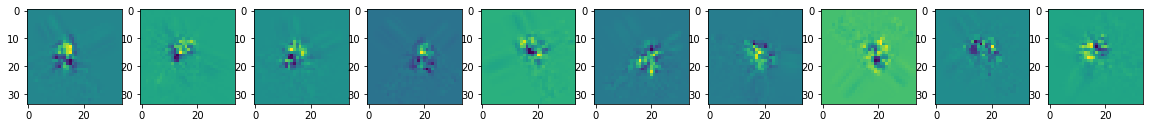

real


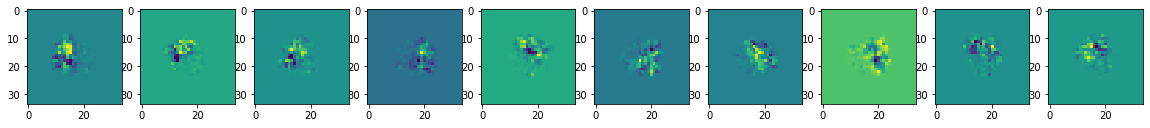

generated


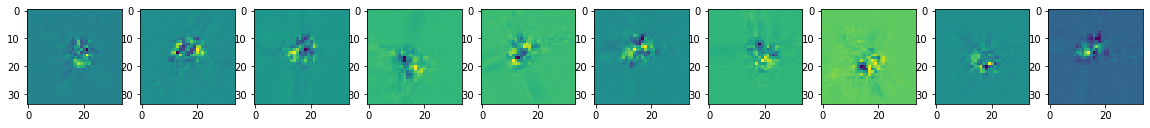

real


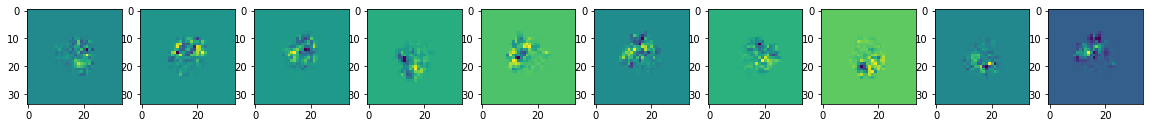

generated


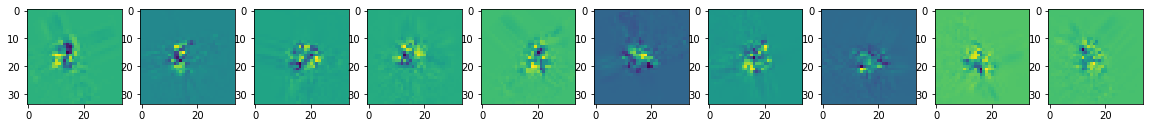

real


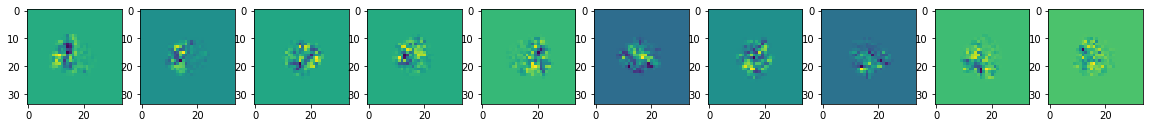

generated


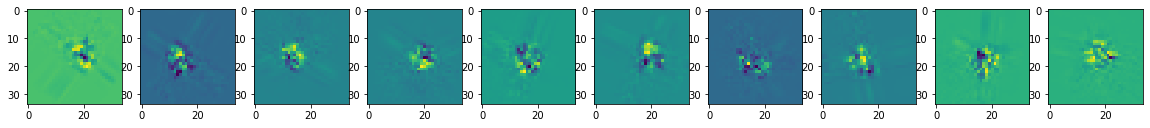

real


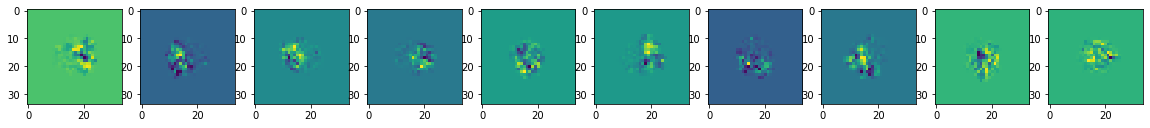

generated


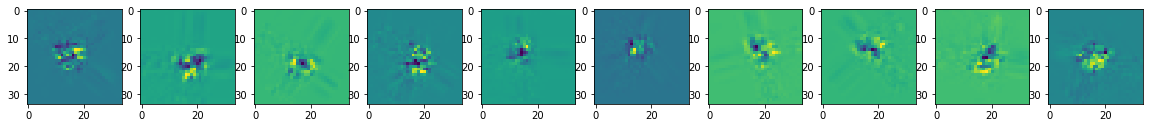

real


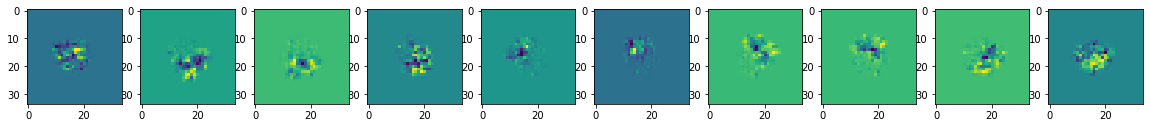

generated


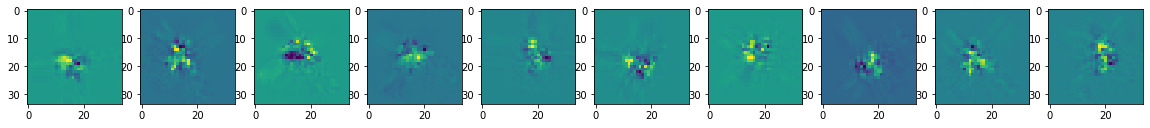

real


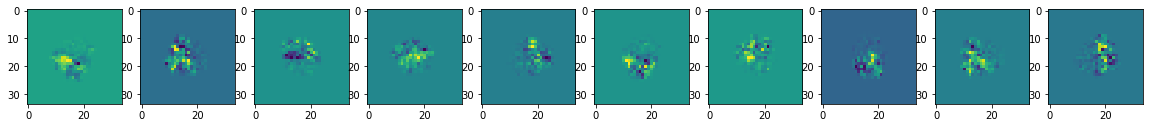

generated


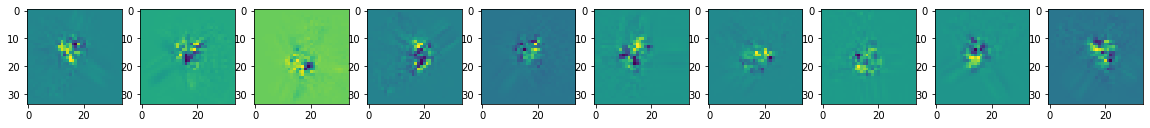

real


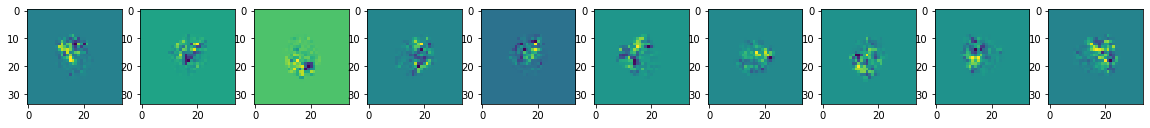

generated


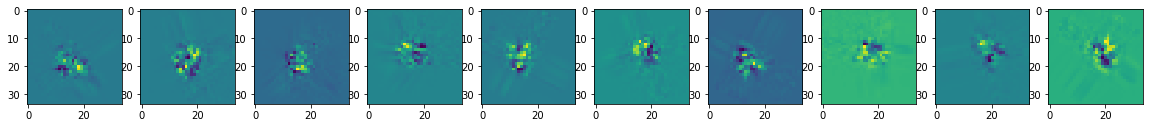

real


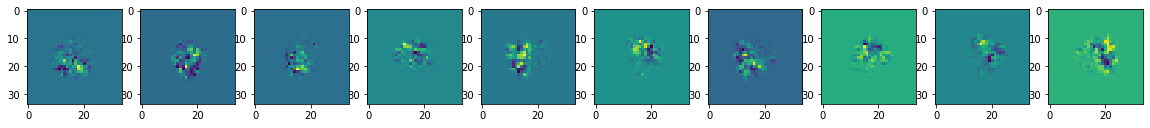

generated


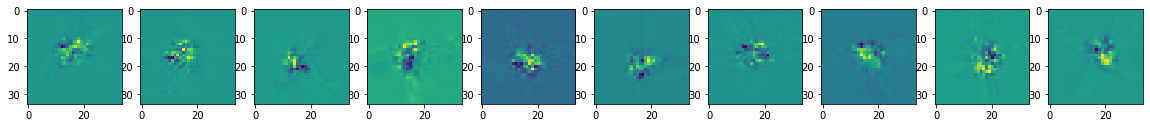

real


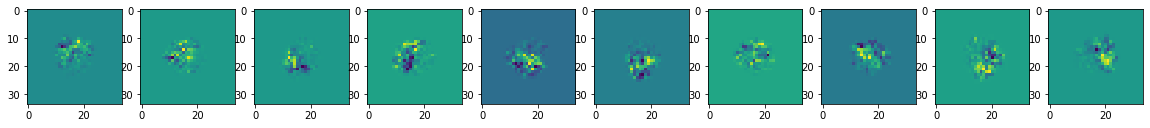

generated


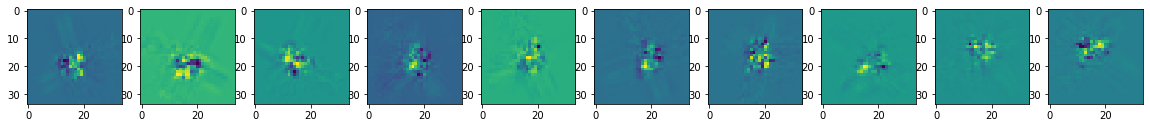

real


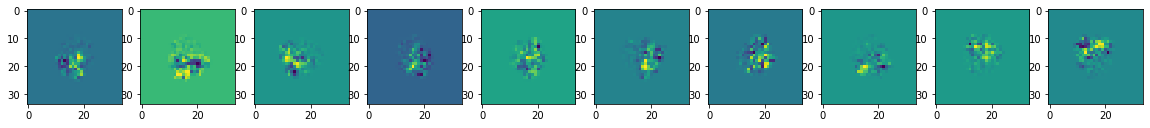

generated


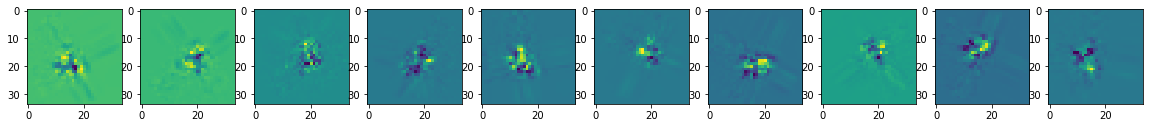

real


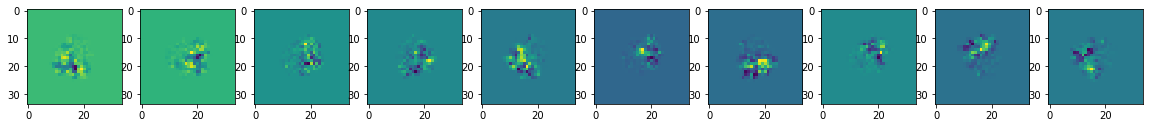

(4800, 5832, 1)


In [23]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [29]:
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


'\nx = Coef.reshape(5000, -1)\nz = tsne.fit_transform(x) \n'

In [30]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


'\nnp.random.seed(0)\n\nindexs = np.random.randint(5, size = 5000)\nprint(indexs[:10])\ndf = pd.DataFrame()\ndf["y"] = indexs\ndf["comp-1"] = z[:,0]\ndf["comp-2"] = z[:,1]\n\nsns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),\n                palette=sns.color_palette("hls", 5),\n                data=df).set(title="5Ribsome data true label") \n\n'

In [31]:
from sklearn.decomposition import PCA
print(Coef.shape)
Coef = Coef.reshape(4800, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

(4800, 5832)
(4800, 5)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.004s...
[t-SNE] Computed neighbors for 4800 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 2.728990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.961380
[t-SNE] KL divergence after 1000 iterations: 0.679333
[4 0 3 3 3 1 3 2 4 0]


[Text(0.5, 1.0, '5Ribsome data true label')]

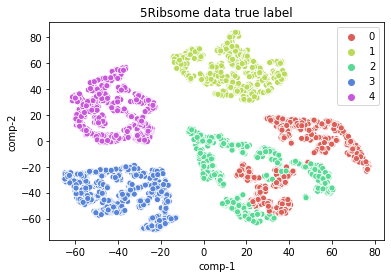

In [28]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)

indexs = np.random.randint(5, size = 15000)[:4800]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


[Text(0.5, 1.0, '5Ribsome data k-mean')]

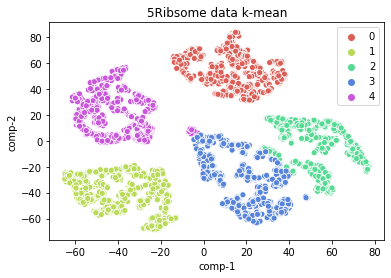

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(z)
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [31]:
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(indexs, kmeans.labels_))

0.8253220170993534


In [ ]:
Images = new_projection[:5000]
print(Images.shape)
exp_name = '1216_n_15_MPCA'
ProjSize, num_image, n_component = 34, 5000, 15
batch_size = 500
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
"""
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(32, 32, 32)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
"""
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size)

#MP3.fit(start_ratio = 0.1)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


In [58]:
"""
c = 0
im_cs = [i for i in range(10)]

for c in im_cs:
    fig = plt.figure()
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
    (ax1, ax2) = gs.subplots(sharex='col', sharey='row')
    
    
    print('generated')
    est_I = MP3.AU @ MP3.mu
    AU = est_I.detach().numpy()
    #print(AU.shape)
    image = AU[c].reshape(MP3.ProjSize,MP3.ProjSize, order = 'F')
    ax1.imshow(image)
    #plt.imshow(image) # quarter rotation
    #plt.show()
    #MP3.Q_Function()

    #MP3.Maximization()
    print('real')
    #plt.imshow(Images[c])
    ax2.imshow(Images[c])
    plt.show()
"""

"\nc = 0\nim_cs = [i for i in range(10)]\n\nfor c in im_cs:\n    fig = plt.figure()\n    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)\n    (ax1, ax2) = gs.subplots(sharex='col', sharey='row')\n    \n    \n    print('generated')\n    est_I = MP3.AU @ MP3.mu\n    AU = est_I.detach().numpy()\n    #print(AU.shape)\n    image = AU[c].reshape(MP3.ProjSize,MP3.ProjSize, order = 'F')\n    ax1.imshow(image)\n    #plt.imshow(image) # quarter rotation\n    #plt.show()\n    #MP3.Q_Function()\n\n    #MP3.Maximization()\n    print('real')\n    #plt.imshow(Images[c])\n    ax2.imshow(Images[c])\n    plt.show()\n"

In [ ]:
MP3.fit()


In [ ]:
c =250
AU = MP3.AU.detach().numpy()
print(AU.shape)
image = AU[c].reshape(48,48, order = 'F')
plt.imshow(image) # quarter rotation
plt.show()
#MP3.Q_Function()

#MP3.Maximization()
plt.imshow(Images[c])
plt.show()

In [ ]:
MP3.Q.backward()

In [ ]:
MP3.U1.grad
lr = torch.mean(torch.abs(MP3.U1)) /  torch.mean(torch.abs(MP3.U1.grad))
print(lr)
MP3.U1 = MP3.U1 + lr * MP3.U1.grad

MP3.U1.grad.data.zero_()

In [ ]:
#print(MP3.U1.grad)
#MP3.U1.grad.data.zero_()

In [ ]:
t_list = [] 
for i in range(5):
    t_list.append(torch.eye(ProjSize, requires_grad = True))
loss = 0
for i in range(5):
    loss = loss + t_list[i]

loss = torch.sum(loss)
print(loss)
loss.backward()

In [ ]:
t_list[0].grad

In [19]:
Images = new_projection[:4800]
print(Images.shape)
exp_name = '20220209_n_18_MPCA'
ProjSize, num_image, n_component = 34, 4800, 18
batch_size = 400
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose
"""
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(32, 32, 32)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
"""
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = MPCA_3d_recon(ProjSize, num_image, n_component, op , Images, exp_name, batch_size)
#MP3.fit(start_ratio = 0.1)
"""
MP3.A_pro_All_U()

MP3.Plot_temp()
MP3.Q_Function()

MP3.Expectation()
MP3.Q_Function()
MP3.Maximization()
MP3.Plot_temp()
MP3.Q_Function()
print(MP3.All_U.shape)
"""


(4800, 34, 34)


/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)


'\nMP3.A_pro_All_U()\n\nMP3.Plot_temp()\nMP3.Q_Function()\n\nMP3.Expectation()\nMP3.Q_Function()\nMP3.Maximization()\nMP3.Plot_temp()\nMP3.Q_Function()\nprint(MP3.All_U.shape)\n'

In [20]:
n = 18
U1 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U2.pt')
U3 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U3.pt')
MP3.U1.data[:, :n] = U1.detach()
MP3.U2.data[:, :n] = U2.detach()
MP3.U3.data[:, :n] = U3.detach()

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


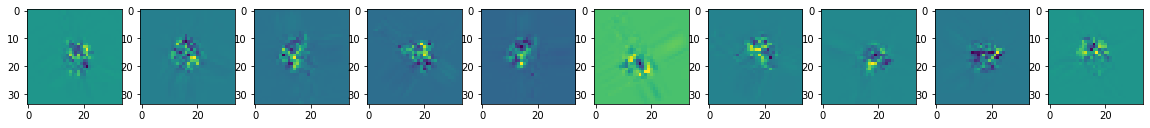

real


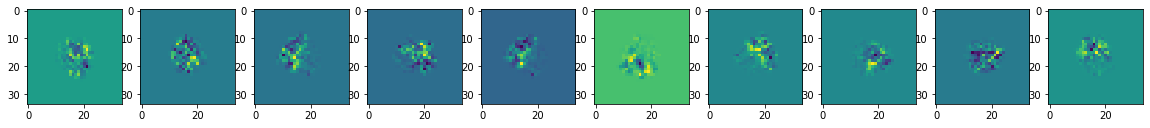

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


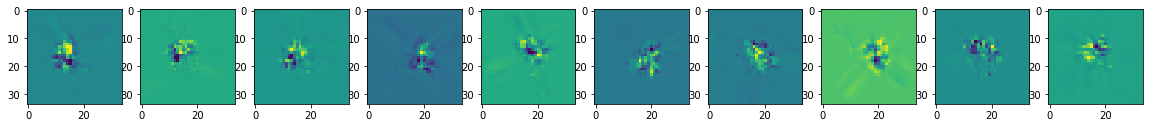

real


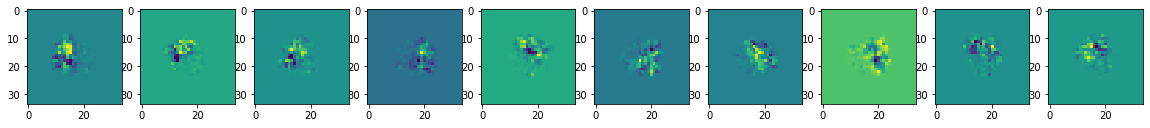

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


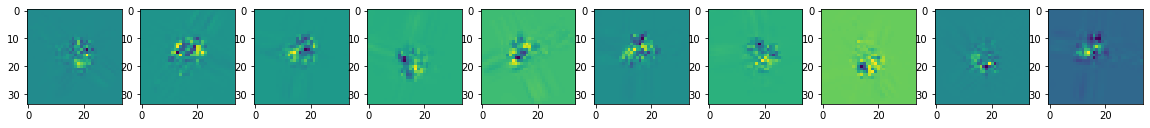

real


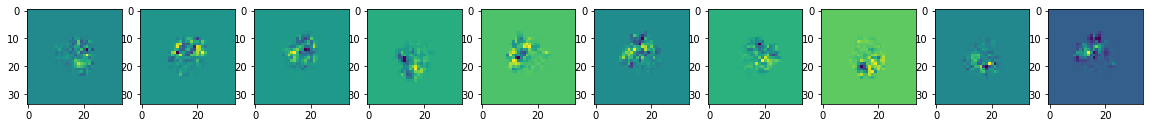

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


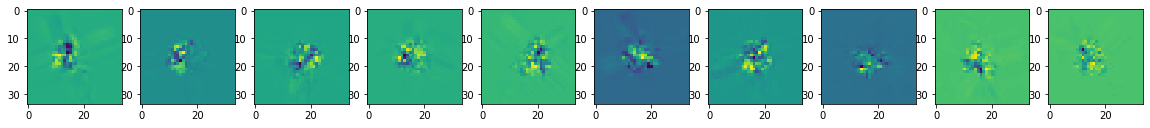

real


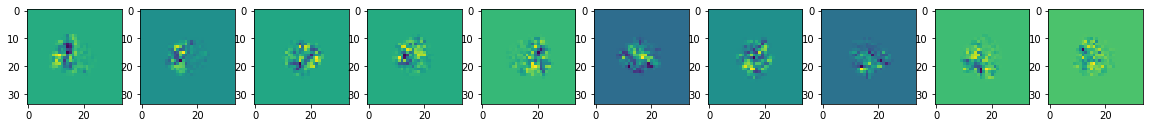

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


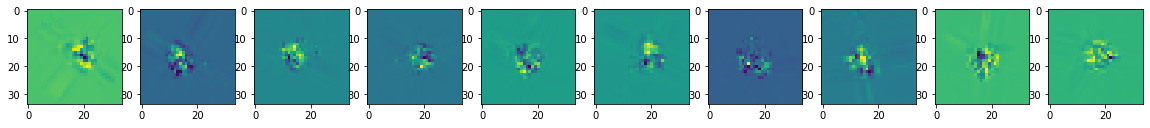

real


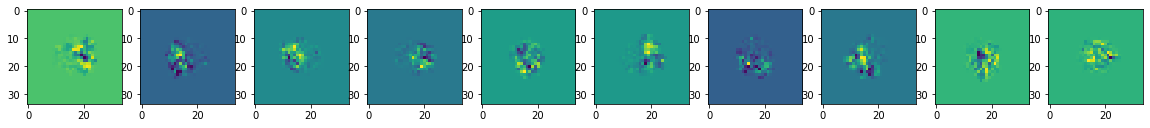

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


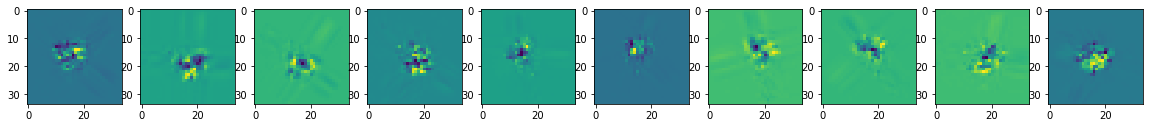

real


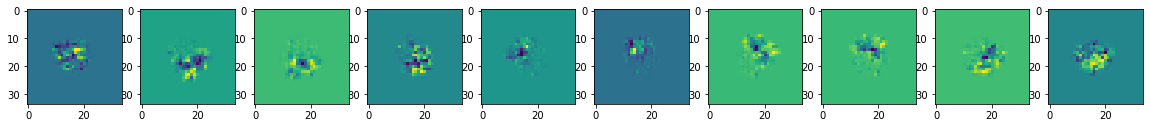

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


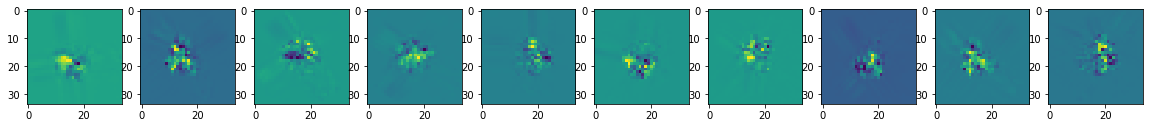

real


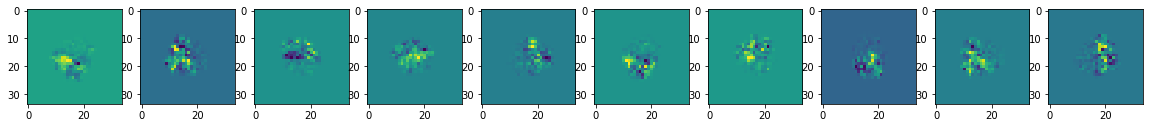

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


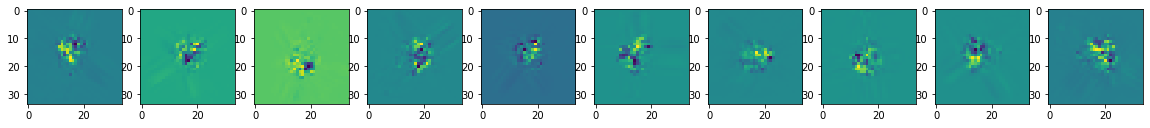

real


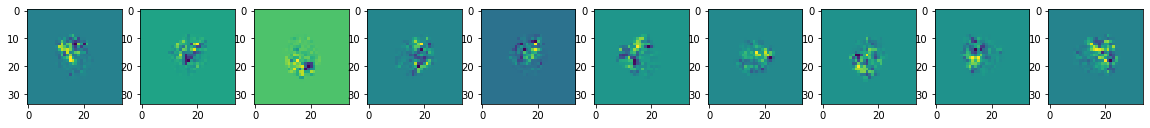

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


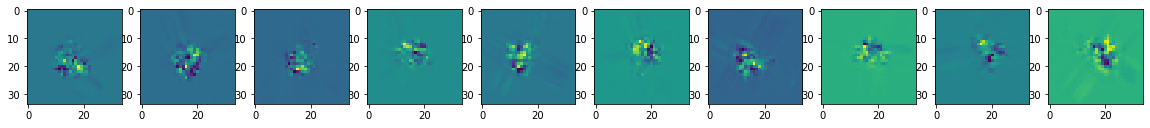

real


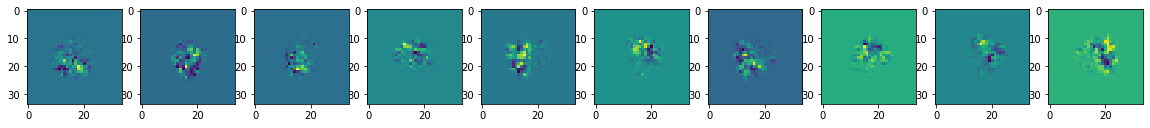

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


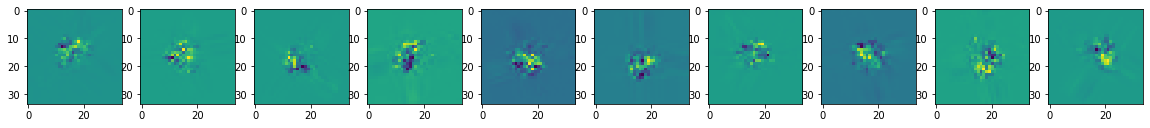

real


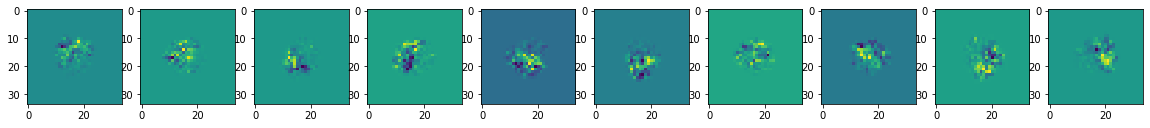

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


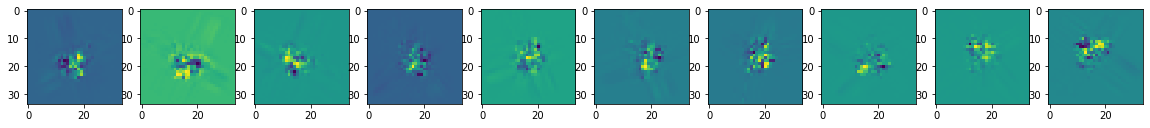

real


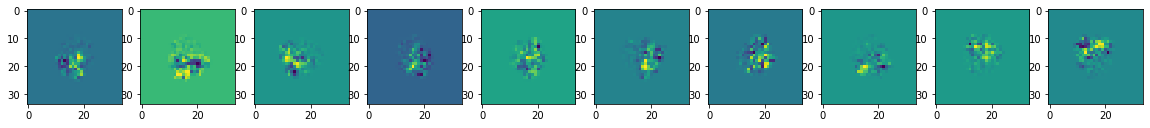

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

generated


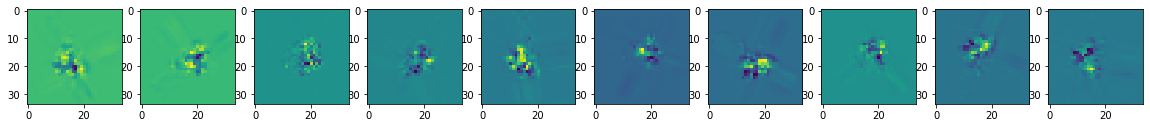

real


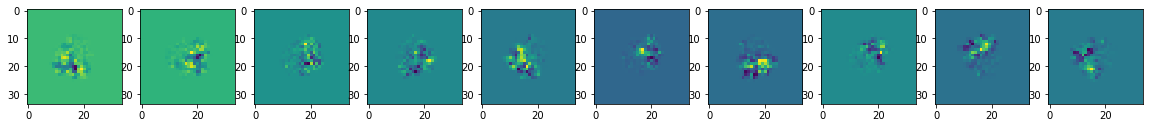

[[0.022230781614780426], [1.7216789722442627], [0.5147484540939331], [-0.3249145448207855], [-0.5070991516113281], [-0.8505185842514038], [-1.0970765352249146], [-1.357439637184143], [-0.880003809928894], [2.1599154472351074], [4.455454349517822], [6.0641021728515625], [4.278499603271484], [6.723085880279541], [-0.38730552792549133], [-0.3816407024860382], [-1.6207537651062012], [-0.053217411041259766], [-2.3965086936950684], [-0.6734477281570435], [-0.14307352900505066], [-0.3226523995399475], [-0.35895270109176636], [-0.31704288721084595], [-0.329086035490036], [-0.4548609256744385], [-0.5458707809448242], [-0.47254514694213867], [-0.9692840576171875], [-0.3154776692390442], [1.4158449172973633], [0.03784743323922157], [0.0731978565454483], [-0.19191433489322662], [0.0648936927318573], [-1.2333998680114746], [-3.597292184829712], [-0.9731484055519104], [-0.8252717852592468], [-1.5815675258636475], [-0.8659459948539734], [-1.4700738191604614], [-1.6708624362945557], [-1.45929932594299

(4800, 5832, 1)


In [21]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [22]:
from sklearn.decomposition import PCA
print(Coef.shape)
Coef = Coef.reshape(4800, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

(4800, 5832, 1)
(4800, 5)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.002s...
[t-SNE] Computed neighbors for 4800 samples in 0.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 2.728990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.961380
[t-SNE] KL divergence after 1000 iterations: 0.679333
[4 0 3 3 3 1 3 2 4 0]


[Text(0.5, 1.0, '5Ribsome data true label')]

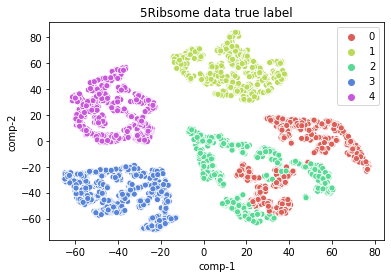

In [26]:
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""

z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)[:4800]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


[Text(0.5, 1.0, '5Ribsome data k-mean')]

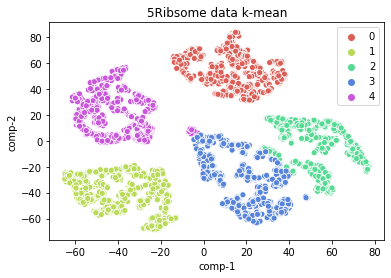

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(z)
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 